In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

# KNN & Draft Round

In [2]:
df = pd.read_csv('Offense/clean_offense.csv')
df.head(50)

,Rk,Year,Player,Pos,AV,School,College,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Drafted,Round,Draft_Outcome
0,1,2000,Bashir Yamini,WR,0.0,Iowa,College Stats,75,191,4.53,33.0,NaN,130.0,7.09,4.18,NaN,8,undrafted
1,2,2000,Spergon Wynn,QB,2.0,Texas State,College Stats,75,229,4.91,34.0,NaN,108.0,7.71,4.59,Cleveland Browns,6,drafted
2,3,2000,James Williams,WR,4.0,Marshall,College Stats,71,180,4.59,36.0,NaN,123.0,7.22,4.16,Seattle Seahawks,6,drafted
3,4,2000,Bobbie Williams,OT,64.0,Arkansas,NaN,76,332,5.26,29.0,28.0,97.0,7.78,4.72,Philadelphia Eagles,2,drafted
4,5,2000,Michael Wiley,RB,4.0,Ohio State,College Stats,71,193,4.50,NaN,NaN,NaN,NaN,NaN,Dallas Cowboys,5,drafted
5,6,2000,Dez White,WR,19.0,Georgia Tech,College Stats,73,218,4.62,37.5,NaN,124.0,6.91,4.09,Chicago Bears,3,drafted
6,7,2000,Austin Wheatley,TE,0.0,Iowa,College Stats,76,254,4.66,32.5,NaN,121.0,6.97,4.18,New Orleans Saints,5,drafted
7,8,2000,James Whalen,TE,1.0,Kentucky,College Stats,74,228,4.78,31.0,NaN,110.0,7.42,4.22,Tampa Bay Buccaneers,5,drafted
8,9,2000,Peter Warrick,WR,29.0,Florida State,College Stats,71,194,4.58,NaN,NaN,NaN,NaN,NaN,Cincinnati Bengals,1,drafted
9,10,2000,Troy Walters,WR,13.0,Stanford,College Stats,66,171,4.55,32.5,NaN,106.0,6.61,3.84,Minnesota Vikings,5,drafted


In [3]:
df.count()

Rk               2910
Year             2910
Player           2910
Pos              2910
AV               2008
School           2910
College          2182
Height           2910
Wt               2910
40YD             2880
Vertical         2332
BenchReps        1773
Broad Jump       2295
3Cone            1973
Shuttle          1999
Drafted          1777
Round            2910
Draft_Outcome    2910
dtype: int64

In [4]:
df3 = df[['Rk','Year','Player','Pos','School','Height','Wt','40YD','Vertical','BenchReps','Broad Jump','3Cone','Shuttle','Round','Draft_Outcome']]
df3.head()

,Rk,Year,Player,Pos,School,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Round,Draft_Outcome
0,1,2000,Bashir Yamini,WR,Iowa,75,191,4.53,33.0,NaN,130.0,7.09,4.18,8,undrafted
1,2,2000,Spergon Wynn,QB,Texas State,75,229,4.91,34.0,NaN,108.0,7.71,4.59,6,drafted
2,3,2000,James Williams,WR,Marshall,71,180,4.59,36.0,NaN,123.0,7.22,4.16,6,drafted
3,4,2000,Bobbie Williams,OT,Arkansas,76,332,5.26,29.0,28.0,97.0,7.78,4.72,2,drafted
4,5,2000,Michael Wiley,RB,Ohio State,71,193,4.50,NaN,NaN,NaN,NaN,NaN,5,drafted


In [5]:
df2 = df3.dropna(axis='rows')
df2.head()

,Rk,Year,Player,Pos,School,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Round,Draft_Outcome
3,4,2000,Bobbie Williams,OT,Arkansas,76,332,5.26,29.0,28.0,97.0,7.78,4.72,2,drafted
10,11,2000,Todd Wade,OT,Mississippi,80,326,5.22,27.5,29.0,101.0,7.68,4.68,2,drafted
11,12,2000,Michael Thompson,OT,Tennessee State,76,305,5.28,26.0,16.0,104.0,7.99,4.73,4,drafted
14,15,2000,Mark Tauscher,OG,Wisconsin,75,318,5.37,27.0,22.0,90.0,7.91,4.84,7,drafted
16,17,2000,Shyrone Stith,RB,Virginia Tech,67,204,4.60,35.0,13.0,111.0,7.14,4.14,7,drafted


In [6]:
df2.count()

Rk               1245
Year             1245
Player           1245
Pos              1245
School           1245
Height           1245
Wt               1245
40YD             1245
Vertical         1245
BenchReps        1245
Broad Jump       1245
3Cone            1245
Shuttle          1245
Round            1245
Draft_Outcome    1245
dtype: int64

In [7]:
target = df2["Round"]

In [8]:
data = df2[['Height','Wt','40YD','Vertical','BenchReps','Broad Jump','3Cone','Shuttle']]
feature_names = data.columns
data.head()

,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle
3,76,332,5.26,29.0,28.0,97.0,7.78,4.72
10,80,326,5.22,27.5,29.0,101.0,7.68,4.68
11,76,305,5.28,26.0,16.0,104.0,7.99,4.73
14,75,318,5.37,27.0,22.0,90.0,7.91,4.84
16,67,204,4.60,35.0,13.0,111.0,7.14,4.14


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data, target, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [11]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.250
k: 3, Train/Test Score: 0.550/0.250
k: 5, Train/Test Score: 0.508/0.288
k: 7, Train/Test Score: 0.475/0.308
k: 9, Train/Test Score: 0.457/0.317
k: 11, Train/Test Score: 0.456/0.321
k: 13, Train/Test Score: 0.447/0.343
k: 15, Train/Test Score: 0.437/0.340
k: 17, Train/Test Score: 0.427/0.362
k: 19, Train/Test Score: 0.429/0.349


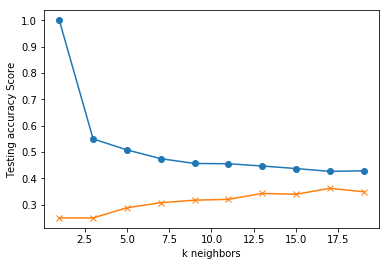

In [12]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [13]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.308


# Logistic Regression & Draft Outcome

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
target_draft = df2["Draft_Outcome"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data, target_draft, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [18]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.617363344051447
Testing Data Score: 0.625


# KNN & Draft Outcome

In [22]:
target_draft = df2["Draft_Outcome"]
target_draft.head()

3     drafted
10    drafted
11    drafted
14    drafted
16    drafted
Name: Draft_Outcome, dtype: object

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data, target_draft, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [25]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.593
k: 3, Train/Test Score: 0.794/0.644
k: 5, Train/Test Score: 0.762/0.660
k: 7, Train/Test Score: 0.719/0.679
k: 9, Train/Test Score: 0.703/0.667
k: 11, Train/Test Score: 0.697/0.657
k: 13, Train/Test Score: 0.715/0.651
k: 15, Train/Test Score: 0.703/0.644
k: 17, Train/Test Score: 0.712/0.651
k: 19, Train/Test Score: 0.710/0.651


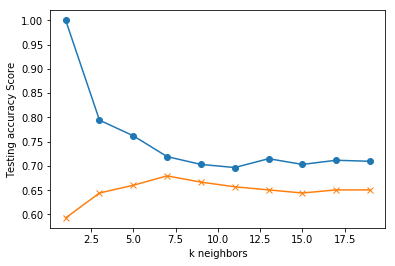

In [26]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [27]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.663


# Random Trees & Draft Outcome

In [28]:
from sklearn import tree
import pandas as pd
import os

In [29]:
target_draft = df2["Draft_Outcome"]
target_names = ["drafted","undrafted"]
target_draft.head()

3     drafted
10    drafted
11    drafted
14    drafted
16    drafted
Name: Draft_Outcome, dtype: object

In [30]:
data.head()

,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle
3,76,332,5.26,29.0,28.0,97.0,7.78,4.72
10,80,326,5.22,27.5,29.0,101.0,7.68,4.68
11,76,305,5.28,26.0,16.0,104.0,7.99,4.73
14,75,318,5.37,27.0,22.0,90.0,7.91,4.84
16,67,204,4.60,35.0,13.0,111.0,7.14,4.14


In [31]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.5608974358974359

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.6698717948717948

In [33]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.1668532870837132, '40YD'),
 (0.1535271193403666, '3Cone'),
 (0.14346401837475975, 'Wt'),
 (0.12031251694490143, 'BenchReps'),
 (0.11982859397882904, 'Shuttle'),
 (0.11642885862243596, 'Broad Jump'),
 (0.10407088594721346, 'Vertical'),
 (0.0755147197077806, 'Height')]

# SVM & Draft Outcome

In [77]:
target_names = ['undrafted','drafted']

In [78]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test= train_test_split(data, target_draft, random_state=42)

In [79]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [80]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.679


In [81]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

    drafted       0.71      0.84      0.77       195
  undrafted       0.60      0.42      0.49       117

avg / total       0.67      0.68      0.66       312



# GridSearch & Draft Round

In [39]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data, target, random_state=42)

In [42]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ..... C=1, gamma=0.0001, score=0.37898089171974525, total=   4.7s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.3935483870967742, total=   3.9s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.7s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.3851132686084142, total=   4.7s
[CV] C=1, gamma=0.001 ................................................
[CV] ...... C=1, gamma=0.001, score=0.37898089171974525, total=   4.9s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.3935483870967742, total=   4.1s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.3851132686084142, total=   4.8s
[CV] C=1, gamma=0.01 .................................................
[CV] ....... C=1, gamma=0.01, score=0.37898089171974525, total=   4.8s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.3935483870967742, total=   3.8s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.3851132686084142, total=   4.7s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  4.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [43]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 5, 'gamma': 0.0001}


In [44]:
# List the best score
print(grid.best_score_)

0.38692390139335475


In [45]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [46]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          1       0.25      0.06      0.10        17
          2       0.14      0.05      0.07        21
          3       0.00      0.00      0.00        28
          4       0.00      0.00      0.00        34
          5       0.00      0.00      0.00        39
          6       0.00      0.00      0.00        25
          7       0.00      0.00      0.00        31
          8       0.38      0.98      0.55       117

avg / total       0.17      0.38      0.22       312



/Users/tylermcbeth/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Grid Search and Draft Outcome

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data, target_draft, random_state=42)

In [83]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [84]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [85]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.6881028938906752, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.6109324758842444, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.7106109324758842, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.6881028938906752, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.6109324758842444, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.7106109324758842, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=5, gamma=0.0001, score=0.7266881028938906, total=   0.0s
[CV] C=5, gamma=0.001 ................................................
[CV] ....... C=5, gamma=0.001, score=0.6945337620578779, total=   0.0s
[CV] C=5, gamma=0.001 ................................................
[CV] ....... C=5, gamma=0.001, score=0.6205787781350482, total=   0.0s
[CV] C=5, gamma=0.001 ................................................
[CV] ....... C=5, gamma=0.001, score=0.7266881028938906, total=   0.0s
[CV] C=5, gamma=0.01 .................................................
[CV] ........ C=5, gamma=0.01, score=0.6945337620578779, total=   0.0s
[CV] C=5, gamma=0.01 .................................................
[CV] ........ C=5, gamma=0.01, score=0.6205787781350482, total=   0.0s
[CV] C=5, gamma=0.01 .................................................
[CV] ........ C=5, gamma=0.01, score=0.7266881028938906, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [86]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 10, 'gamma': 0.0001}


In [87]:
# List the best score
print(grid.best_score_)

0.6827438370846731


In [88]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [89]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

    drafted       0.62      1.00      0.77       195
  undrafted       0.00      0.00      0.00       117

avg / total       0.39      0.62      0.48       312



/Users/tylermcbeth/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Neural Network & Draft Outcome

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data, target_draft, random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [55]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [56]:
from tensorflow.keras.utils import to_categorical

/Users/tylermcbeth/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [57]:
from keras.utils import to_categorical
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(["drafted","undrafted"])
y_train_binary = le.transform(y_train)
y_test_binary = le.transform(y_test)

Using TensorFlow backend.


In [58]:
y_test_binary

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,

In [59]:
from tensorflow.keras.utils import to_categorical

In [60]:
# One-hot encoding
y_train_categorical = to_categorical(y_train_binary)
y_test_categorical = to_categorical(y_test_binary)

In [61]:
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [62]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=8))
model.add(Dense(units=2, activation='softmax'))

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 54        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 0s - loss: 0.7157 - acc: 0.4877
Epoch 2/100
 - 0s - loss: 0.6844 - acc: 0.5434
Epoch 3/100
 - 0s - loss: 0.6691 - acc: 0.5766
Epoch 4/100
 - 0s - loss: 0.6608 - acc: 0.6152
Epoch 5/100
 - 0s - loss: 0.6558 - acc: 0.6399
Epoch 6/100
 - 0s - loss: 0.6517 - acc: 0.6442
Epoch 7/100
 - 0s - loss: 0.6486 - acc: 0.6452
Epoch 8/100
 - 0s - loss: 0.6456 - acc: 0.6484
Epoch 9/100
 - 0s - loss: 0.6426 - acc: 0.6517
Epoch 10/100
 - 0s - loss: 0.6393 - acc: 0.6527
Epoch 11/100
 - 0s - loss: 0.6365 - acc: 0.6495
Epoch 12/100
 - 0s - loss: 0.6348 - acc: 0.6527
Epoch 13/100
 - 0s - loss: 0.6324 - acc: 0.6570
Epoch 14/100
 - 0s - loss: 0.6302 - acc: 0.6592
Epoch 15/100
 - 0s - loss: 0.6279 - acc: 0.6581
Epoch 16/100
 - 0s - loss: 0.6258 - acc: 0.6570
Epoch 17/100
 - 0s - loss: 0.6241 - acc: 0.6602
Epoch 18/100
 - 0s - loss: 0.6224 - acc: 0.6656
Epoch 19/100
 - 0s - loss: 0.6205 - acc: 0.6624
Epoch 20/100
 - 0s - loss: 0.6192 - acc: 0.6624
Epoch 21/100
 - 0s - loss: 0.6170 - acc: 0.6635
E

# Deep Learning & Draft Outcome

In [66]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=8))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [67]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 14        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [68]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 1s - loss: 0.6889 - acc: 0.5466
Epoch 2/100
 - 0s - loss: 0.6780 - acc: 0.6174
Epoch 3/100
 - 0s - loss: 0.6685 - acc: 0.6174
Epoch 4/100
 - 0s - loss: 0.6594 - acc: 0.6174
Epoch 5/100
 - 0s - loss: 0.6529 - acc: 0.6174
Epoch 6/100
 - 0s - loss: 0.6485 - acc: 0.6174
Epoch 7/100
 - 0s - loss: 0.6451 - acc: 0.6174
Epoch 8/100
 - 0s - loss: 0.6421 - acc: 0.6174
Epoch 9/100
 - 0s - loss: 0.6390 - acc: 0.6174
Epoch 10/100
 - 0s - loss: 0.6374 - acc: 0.6174
Epoch 11/100
 - 0s - loss: 0.6347 - acc: 0.6174
Epoch 12/100
 - 0s - loss: 0.6315 - acc: 0.6174
Epoch 13/100
 - 0s - loss: 0.6289 - acc: 0.6174
Epoch 14/100
 - 0s - loss: 0.6265 - acc: 0.6174
Epoch 15/100
 - 0s - loss: 0.6246 - acc: 0.6174
Epoch 16/100
 - 0s - loss: 0.6219 - acc: 0.6174
Epoch 17/100
 - 0s - loss: 0.6202 - acc: 0.6174
Epoch 18/100
 - 0s - loss: 0.6175 - acc: 0.6184
Epoch 19/100
 - 0s - loss: 0.6187 - acc: 0.6217
Epoch 20/100
 - 0s - loss: 0.6143 - acc: 0.6388
Epoch 21/100
 - 0s - loss: 0.6129 - acc: 0.6484
E

In [69]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.6313388958955423, Accuracy: 0.6826923076923077


In [70]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Deep Neural Network - Loss: 0.6421801050504049, Accuracy: 0.6570512835796063


# ML Comparison

In [91]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [92]:
# Load Data
x = data
Y = target_draft

In [93]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(x)

In [94]:
x_scaled = X_scaler.transform(x)

In [73]:
# prepare configuration for cross validation test harness
seed = 7

In [97]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [98]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_scaled, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.683587 (0.051329)
LDA: 0.684381 (0.047826)
KNN: 0.645800 (0.043200)
RFC: 0.650587 (0.043157)
CART: 0.589516 (0.069626)
NB: 0.626458 (0.051371)
SVM: 0.685181 (0.038523)


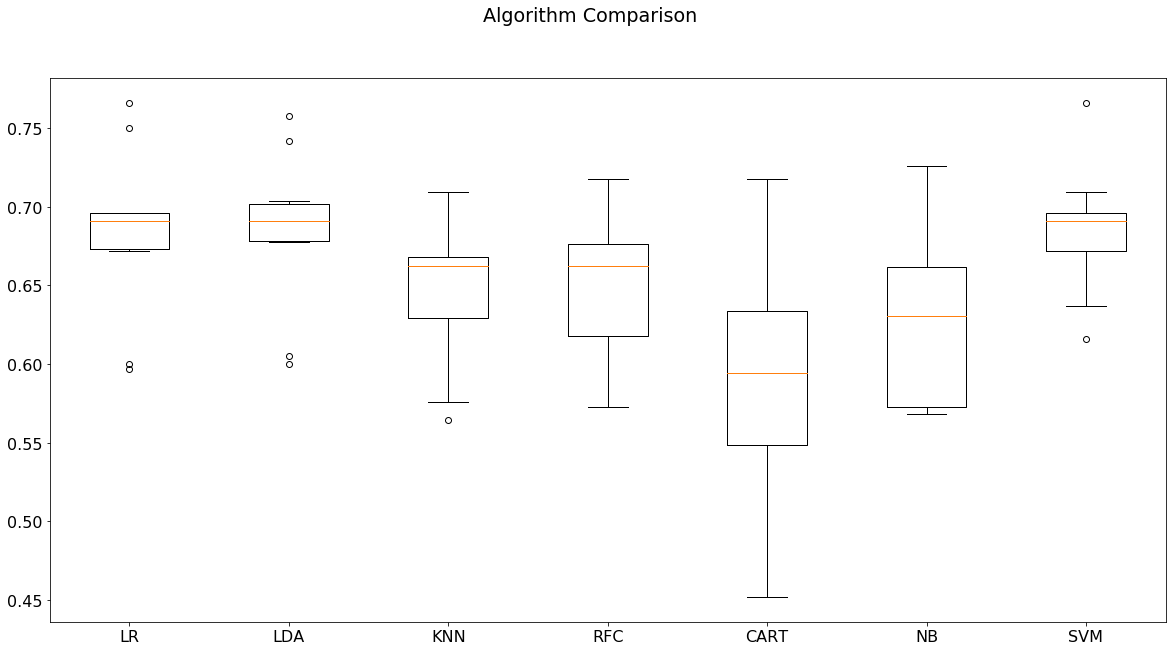

In [99]:
# boxplot algorithm comparison
fig = plt.figure()



plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()